In [1]:
# ProAc 1.0.0 Python

#import plotly.express as px

# Point Kaleido to the Chromium 
import os
os.environ["KALEIDO_EXECUTABLE"] = "/Applications/Chromium.app/Contents/MacOS/Chromium"
#os.environ["KALEIDO_EXECUTABLE"] = "/opt/homebrew/Caskroom/chromium/latest/Chromium.app/Contents/MacOS/Chromium"

import plotly.graph_objects as go
import pandas as pd
import numpy as np
#import warnings
import kaleido


In [5]:
## User input ----------------------------

FirstName             = 'Fabio'
LastName              = 'Crameri' 
YearUpperLimitUser    = None #Set upper limit year here (e.g., 2025), or use current year when set to: None

#FileName              = "/Users/Fabio/ETH/CV/ScientificOutput/ScientificOutputCrameri.csv"
FileName              = './ScientificOutputCrameri.csv'
#FileName              = './ScientificOutput-Template.csv'
#FileName              = './ScientificOutput-ZERO.csv'

SaveSVG               = True
SavePDF               = True
SavePNG               = True
SaveHTML              = False

TransparentBackground = False
DarkMode              = False

#------------------------------------
# Set defaults – Do not make changes
ProAc_VersionNumber = 1.0
VerboseMode = False
ExchangeColours = True
InvertOnlyLightness = True
lightenUpFactor = 0.0
# Colours
ColourPalette = 'ProAc1'
FigScale = 5

if SavePNG or SaveSVG:
    #TransparentBackground = True  #Let the user decide here
else:
    TransparentBackground = False

if pd.isna(YearUpperLimitUser) or YearUpperLimitUser=="current" :
    YearUpperLimitUser = int( pd.to_datetime('today').strftime('%Y') )
IN_YearUpperLimit = int(YearUpperLimitUser)

if DarkMode:
    darkFactor = -1
else:
    darkFactor = 1

if ColourPalette=='ProAc1':
#else:#ColourPalette=="ProAc1"
    Colour1 = [36,70,95] #[1,25,89] #'#061A55' #blue
    Colour2 = [228,169,161] #[253,186,196] #'#f3bdc4' #'#F3BDC4' #light pink
    #Colour3 = [125,58,69] #'#753E46' #dark pink
    #Colour4 = [255,237,247] #'#fceef6' #'#FCEEF6' #lightlight pink

Colour5 = [200,200,200] #lightlight grey

if DarkMode and ExchangeColours:
    dummy = Colour1
    Colour1 = Colour2
    Colour2 = dummy
    Colour5 = [255-element for element in Colour5]
    lightenUpFactor = 0.05

Colour3 = [max(0,min(255,element-255*0.5*darkFactor)) for element in Colour2] #[125,58,69] #'#753E46' #dark pink
Colour4 = [max(0,min(255,element+255*(0.2-lightenUpFactor)*darkFactor)) for element in Colour2] #[255,237,247] #'#FCEEF6' #lightlight pink


if DarkMode:
    ForegroundColour = 'rgb(255,255,255)'
    BackgroundColour = 'rgb(0,0,0)'
    TransparentColour = "rgba(0,0,0,0)"
    if not ExchangeColours:
        if InvertOnlyLightness: 
            lightenUpFactor = 1. #15
            dummy = [element+(255-min(Colour1))-max(Colour1)+min((element)/100*lightenUpFactor,element) for element in Colour1]
            Colour1 = dummy
            dummy = [element+(255-min(Colour2))-max(Colour2)+min((element)/100*lightenUpFactor,element) for element in Colour2]
            Colour2 = dummy
            dummy = [element+(255-min(Colour3))-max(Colour3)+min((element)/100*lightenUpFactor,element) for element in Colour3]
            Colour3 = dummy
            dummy = [element+(255-min(Colour4))-max(Colour4)+min((element)/100*lightenUpFactor,element) for element in Colour4]
            Colour4 = dummy
            dummy = [element+(255-min(Colour5))-max(Colour5)+min((element)/100*lightenUpFactor,element) for element in Colour5]
            Colour5 = dummy
        else:
            Colour1 = [255-element for element in Colour1]
            Colour2 = [255-element for element in Colour2]
            Colour3 = [255-element for element in Colour3]
            Colour4 = [255-element for element in Colour4]
            Colour5 = [255-element for element in Colour5]

else:
    ForegroundColour = 'rgb(0,0,0)'
    BackgroundColour = 'rgb(255,255,255)'
    TransparentColour = 'rgba(255,255,255,0)'

Colour1 = "rgb("+str(Colour1[0])+","+str(Colour1[1])+","+str(Colour1[2])+")"
Colour2 = "rgb("+str(Colour2[0])+","+str(Colour2[1])+","+str(Colour2[2])+")"
Colour3 = "rgb("+str(Colour3[0])+","+str(Colour3[1])+","+str(Colour3[2])+")"
Colour4 = "rgb("+str(Colour4[0])+","+str(Colour4[1])+","+str(Colour4[2])+")"
Colour5 = "rgb("+str(Colour5[0])+","+str(Colour5[1])+","+str(Colour5[2])+")"

    
if TransparentBackground:
    CanvasColour = 'rgba(0,0,0,0)'
elif DarkMode:
    CanvasColour = 'rgba(0,0,0,1)'
else:
    CanvasColour = 'rgba(255,255,255,1)'
    
    
BoldString1 = "<b>"
BoldString2 = "</b>"

ProAcString = BoldString1+'ProAc '+BoldString2+str(ProAc_VersionNumber)

CreationDateString = pd.to_datetime('today').strftime('%d-%b-%Y') #"24-Nov-2022"
CreationDateString2 = pd.to_datetime('today').strftime('%Y-%b') #"2022-Nov" - used for file naming
ProAcCopyrightString = '©ProAc Academic Profile ' + str(ProAc_VersionNumber)
UndertoneDesignWatermark = 'by Undertone.design'

AnnotationShiftX = 0.253
AnnotationBaseY = -0.072
ShiftWatermarkY = -0.074

FontSizeGeneral = 18
FontSizeSmall = FontSizeGeneral/2
FontSizeNumbers = 12


## Read CSV
SciOutput = pd.read_csv(FileName)
SciOutput.head()

rowNum = 1
#println("ROW: ",SciOutput[1,:])

colName = "Tag"
#println("COLUMN: ",SciOutput[:,colName])

#individual entry
#println(SciOutput[rowNum,colName])


IndexYear               = "Year"
IndexTag                = "Tag"
IndexKind               = "Kind"
IndexTitle              = "Title"
IndexPublisher        	= "Publisher"
IndexFirstAuthored      = "First authored"
IndexWithPhDsupervisor  = "Including PhD supervisor"
IndexCurrentCitations   = "Citations"
IndexOpenAccess        	= "Open access"

#Clean up column names
if 'FirstAuthored' in SciOutput.columns:
    SciOutput.rename(columns={'FirstAuthored':'First authored'},inplace=True)
if 'IncludingPhDSupervisor' in SciOutput.columns:
    SciOutput.rename(columns={'IncludingPhDSupervisor':'Including PhD supervisor'},inplace=True)
if 'OpenAccess' in SciOutput.columns:
    SciOutput.rename(columns={'OpenAccess':'Open access'},inplace=True)
if 'SingleAuthored' in SciOutput.columns:
    SciOutput.rename(columns={'SingleAuthored':'Single authored'},inplace=True)
if 'PhDPublication' in SciOutput.columns:
    SciOutput.rename(columns={'PhDPublication':'PHD publication'},inplace=True)
if 'FullReference' in SciOutput.columns:
    SciOutput.rename(columns={'FullReference':'Full reference'},inplace=True)
if 'Current number of citations' in SciOutput.columns:
    SciOutput.rename(columns={'Current number of citations':'Citations'},inplace=True)
#print(SciOutput.columns.values)


## Process data
CurrentYear = pd.to_datetime('today').strftime('%Y') #The year until citation numbers are counted to
#CurrentYear = parse(Int64, CurrentYear)
CurrentYear = int(CurrentYear)


if IN_YearUpperLimit<CurrentYear:
    takeOlderThanOne = True
else:
    takeOlderThanOne = False

#clean up data (nan's and empty entries)
#SciOutput = filter!(e->e≠["NaN",""],SciOutput[IndexYear])
#SciOutput(isnan([SciOutput{:,IndexYear}]),:) = []
#SciOutput[IndexYear].replace('', np.nan, inplace=True) #replace any empty strings in the "Years" column with np.nan objects
#SciOutput.dropna(subset=[IndexYear], inplace=True)

#remove last years
#println(findall(SciOutput[IndexYear].>IN_YearUpperLimit))
if IN_YearUpperLimit<int(min(SciOutput[IndexYear])):
    IN_YearUpperLimit = int(min(SciOutput[IndexYear]))

SciOutput = SciOutput[SciOutput[IndexYear]<=IN_YearUpperLimit]
#print(SciOutput)

SciOutputLast5 = SciOutput[SciOutput[IndexYear]>=IN_YearUpperLimit-5]  #Output of past 5 years
#print(SciOutputLast5)
if takeOlderThanOne:
    SciOutputOlder1 = SciOutput[SciOutput[IndexYear]<=IN_YearUpperLimit-1]  #Output older than one year (only if current year is included)
else:
    SciOutputOlder1 = SciOutput[SciOutput[IndexYear]<=IN_YearUpperLimit]  #Output older than one year (only if current year is included)

startYear               = int(min(SciOutput[IndexYear]))
endYear                 = int(max(SciOutput[IndexYear]))
if IN_YearUpperLimit<endYear:
    endYear             = IN_YearUpperLimit

numberYears             = int(endYear-startYear+1)

## Initialising
arraySize1 = (numberYears+1,1)
Years = np.zeros(arraySize1)
SumPeerReviewPaper  = np.zeros(arraySize1)
SumPrePrintPaper    = np.zeros(arraySize1)
SumBlogPost         = np.zeros(arraySize1)
SumNewsViews        = np.zeros(arraySize1)
SumSoftware         = np.zeros(arraySize1)
SumWebsites         = np.zeros(arraySize1)
SumCitations        = np.zeros(arraySize1)
SumCitationsPRP     = np.zeros(arraySize1)
SumCitationsPRPperYr = np.zeros(arraySize1)
SumCitationsCS      = np.zeros(arraySize1)

SumPeerReviewPaperFA  = np.zeros(arraySize1)
SumPrePrintPaperFA    = np.zeros(arraySize1)
SumBlogPostFA         = np.zeros(arraySize1)
SumNewsViewsFA        = np.zeros(arraySize1)
SumSoftwareFA         = np.zeros(arraySize1)
SumWebsitesFA         = np.zeros(arraySize1)
SumCitationsFA        = np.zeros(arraySize1)

SumPeerReviewPaperSV  = np.zeros(arraySize1)
SumPrePrintPaperSV    = np.zeros(arraySize1)
SumBlogPostSV         = np.zeros(arraySize1)
SumNewsViewsSV        = np.zeros(arraySize1)
SumSoftwareSV         = np.zeros(arraySize1)
SumWebsitesSV         = np.zeros(arraySize1)

SumPeerReviewPaperIND  = np.zeros(arraySize1)
SumPrePrintPaperIND    = np.zeros(arraySize1)
SumBlogPostIND         = np.zeros(arraySize1)
SumNewsViewsIND        = np.zeros(arraySize1)
SumSoftwareIND         = np.zeros(arraySize1)
SumWebsitesIND         = np.zeros(arraySize1)
SumCitationsIND        = np.zeros(arraySize1)

SumPeerReviewPaperOA  = np.zeros(arraySize1)
SumPrePrintPaperOA    = np.zeros(arraySize1)
SumBlogPostOA         = np.zeros(arraySize1)
SumNewsViewsOA        = np.zeros(arraySize1)
SumSoftwareOA         = np.zeros(arraySize1)
SumWebsitesOA         = np.zeros(arraySize1)
SumCitationsOA        = np.zeros(arraySize1)



LastLoop = False
for iYears in range(1,numberYears+1+1):
    #print(iYears)
    if iYears==numberYears+1: # Total numbers
        LastLoop = True
        M               = SciOutput
        Mlast5          = SciOutputLast5
        Molder1         = SciOutputOlder1
    else: # Yearly numbers
        M               = SciOutput[SciOutput[IndexYear]==startYear+iYears-1]
        Molder1       	= SciOutputOlder1[SciOutputOlder1[IndexYear]==startYear+iYears-1]

    YearOfLoop          = startYear+iYears-1
    YearsSince          = CurrentYear-YearOfLoop
    SciOutputFA       	= SciOutput[SciOutput[IndexFirstAuthored]==1] #First-authored
    SciOutputIND       	= SciOutput[SciOutput[IndexWithPhDsupervisor]==0] #independent of PhD supervisor

    M_FA                = M[M[IndexFirstAuthored]==1]
    M_SV                = M[M[IndexWithPhDsupervisor]==1]
    M_IND             	= M[M[IndexWithPhDsupervisor]==0] #independent of PhD supervisor
    M_OA                = M[M[IndexOpenAccess]==1] #Open accessible
    if M.empty: #isempty(M):
        M_PRP        	= M
    else:
        M_PRP           = M[M[IndexKind].str.contains('Peer-reviewed paper')] #Peer-reviewed paper
        #M_PRP        	= M[findall(x -> occursin("Peer-reviewed paper",x),M[:,IndexKind]),:] #Peer-reviewed paper
    #print(M_PRP)
    if M.empty: #isempty(M):
        M_CS        	= M
    else:
        M_CS            = M[M[IndexKind].str.contains('Community software')] #software

    dummy        = M[IndexKind] #find different kinds
    dummyOlder1         = Molder1[IndexKind] #find different kinds of older than 1 year
    dummyFA             = M_FA[IndexKind] #find different kinds of first authored output
    dummySV             = M_SV[IndexKind] #find different kinds of output including PhD supervisor
    dummyIND         	= M_IND[IndexKind] #find different kinds of output excluding PhD supervisor
    dummyOA             = M_OA[IndexKind] #find different kinds of output that is open accessible
    CitationsPerOutput          = SciOutput[IndexCurrentCitations]
    CitationsPerOutputFA        = SciOutputFA[IndexCurrentCitations]
    CitationsPerOutputIND       = SciOutputIND[IndexCurrentCitations]

    CitationsPerOutputAndYear 	= SciOutput[IndexCurrentCitations]/(CurrentYear-SciOutput[IndexYear])
    #[CitationsPerOutputAndYearSorted,ind]   = sort(CitationsPerOutputAndYear,'descend')
    # if IN.ShowTitleInRanking
    #     MostImpactfulItems  = strcat( '{\bf{\fontsize{',num2str(FontSizeDetail+3),'}',SciOutput(ind,IndexTag),{'}}, '},SciOutput(ind,IndexTitle),{', {\it'},SciOutput(ind,IndexPublisher),'}' )
    # else
    #     MostImpactfulItems  = strcat( '{\bf{\fontsize{',num2str(FontSizeDetail+3),'}',SciOutput(ind,IndexTag),{'}}, {\it'},SciOutput(ind,IndexPublisher),'}' )
    # end

    if M.empty: #isempty(M):
        countC  = 0
    else:
        countC = 0
        A = M[IndexCurrentCitations]
        #print("here: ",A,sum(A))
        countC = sum(A)
        #for k in range(1,len(A)+1):
        #    countC = countC + A.iloc[k]

    if M_FA.empty: #isempty(M_FA):
        countCFA  = 0
    else:
        countCFA = 0
        A = M_FA[IndexCurrentCitations]
        countCFA = sum(A)
        #for k in range(1,len(A)+1):
        #    countCFA = countCFA + A.iloc[k]

    if M_IND.empty: #isempty(M_IND):
        countCIND  = 0
    else:
        countCIND = 0
        A = M_IND[IndexCurrentCitations]
        countCIND = sum(A)
        #for k in range(1,len(A)+1):
        #    countCIND = countCIND + A.iloc[k]

    if M_PRP.empty: #isempty(M_PRP):
        countCPRP  = 0
    else:
        countCPRP = 0
        A = M_PRP[IndexCurrentCitations]
        countCPRP = sum(A)
        #for k in range(1,len(A)+1):
        #    countCPRP = countCPRP + A.iloc[k]

    if M_CS.empty: #isempty(M_CS):
        countCS  = 0
    else:
        countCS = 0
        A = M_CS[IndexCurrentCitations]
        countCS = sum(A)
        #for k in range(1,len(A)+1):
        #    countCS = countCS + A.iloc[k]

    if M_OA.empty: #isempty(M_OA):
        countOA  = 0
    else:
        countOA = 0
        A = M_OA[IndexCurrentCitations]
        countCOA = sum(A)
        #for k in range(1,len(A)+1):
        #    countOA = countOA + A.iloc[k]

    if LastLoop:
        TotalSumOutput              = np.size(M,0)
        TotalSumOutputPast5         = np.size(Mlast5,0)
        TotalSumOutputOA          	= np.size(M_OA,0)
        M_OApast5                   = Mlast5[Mlast5[IndexOpenAccess]==1] #Open accessible
        TotalSumOutputOAPast5   	= np.size(M_OApast5,0)

        M_CS            = M[M[IndexKind].str.contains('Community software')] #software

        TotalSumPeerReviewPaper     = np.size(dummy[dummy.str.contains('Peer-reviewed paper')],0) #size(findall(x -> occursin("Peer-reviewed paper",x),dummy),1)
        print("Total sum peer-review papers: ",TotalSumPeerReviewPaper)
        TotalSumPeerReviewPaperOlder1 = np.size(dummyOlder1[dummyOlder1.str.contains('Peer-reviewed paper')],0)
        TotalSumPrePrintPaper       = np.size(dummy[dummy.str.contains('Pre-print paper')],0)
        TotalSumBlogPost            = np.size(dummy[dummy.str.contains('Blog post')],0)
        TotalSumNewsViews           = np.size(dummy[dummy.str.contains('News & Views')],0)
        TotalSumSoftware            = np.size(dummy[dummy.str.contains('Community software')],0)
        TotalSumWebsites            = np.size(dummy[dummy.str.contains('Community website')],0)
        TotalSumCitations           = sum(SumCitations)
        TotalSumCitationsFA         = sum(SumCitationsFA)
        TotalSumCitationsIND        = sum(SumCitationsIND)
        TotalSumCitationsPRP     	= sum(SumCitationsPRP)
        TotalSumCitationsPRPperYr 	= sum(SumCitationsPRPperYr)
        TotalSumCitationsPRPperYrOlder1 	= sum(SumCitationsPRPperYr[1:-2])
        TotalSumCitationsPRPperYrAndPaper   = TotalSumCitationsPRPperYr/TotalSumPeerReviewPaper
        if takeOlderThanOne: #remove one year only if diagnostics are taken until this year
            if TotalSumPeerReviewPaperOlder1==0:
                TotalSumCitationsPRPperYrAndPaperOlder1 = 0
            else:
                TotalSumCitationsPRPperYrAndPaperOlder1 = TotalSumCitationsPRPperYrOlder1/TotalSumPeerReviewPaperOlder1
        else:
            TotalSumCitationsPRPperYrAndPaperOlder1   = TotalSumCitationsPRPperYrAndPaper

        TotalSumCitationsCS     	= sum(SumCitationsCS)
        TotalSumCitationsOA     	= sum(SumCitationsOA)
    else:
        Years[iYears]               = startYear+iYears-1

        SumPeerReviewPaper[iYears]  = np.size(dummy[dummy.str.contains('Peer-reviewed paper')],0)
        SumPrePrintPaper[iYears]    = np.size(dummy[dummy.str.contains('Pre-print paper')],0)
        SumBlogPost[iYears]         = np.size(dummy[dummy.str.contains('Blog post')],0)
        SumNewsViews[iYears]        = np.size(dummy[dummy.str.contains('News & Views')],0)
        SumSoftware[iYears]         = np.size(dummy[dummy.str.contains('Community software')],0)
        SumWebsites[iYears]         = np.size(dummy[dummy.str.contains('Community website')],0)
        SumCitations[iYears]        = countC
        SumCitationsPRP[iYears]     = countCPRP
        SumCitationsPRPperYr[iYears]= countCPRP/(max(1,YearsSince))
        SumCitationsCS[iYears]      = countCS
        #First authored
        SumPeerReviewPaperFA[iYears]  = np.size(dummyFA[dummyFA.str.contains('Peer-reviewed paper')],0)
        SumPrePrintPaperFA[iYears]    = np.size(dummyFA[dummyFA.str.contains('Pre-print paper')],0)
        SumBlogPostFA[iYears]         = np.size(dummyFA[dummyFA.str.contains('Blog post')],0)
        SumNewsViewsFA[iYears]        = np.size(dummyFA[dummyFA.str.contains('News & Views')],0)
        SumSoftwareFA[iYears]         = np.size(dummyFA[dummyFA.str.contains('Community software')],0)
        SumWebsitesFA[iYears]         = np.size(dummyFA[dummyFA.str.contains('Community website')],0)
        SumCitationsFA[iYears]      = countCFA
        #Including PhD supervisor
        SumPeerReviewPaperSV[iYears]  = np.size(dummySV[dummySV.str.contains('Peer-reviewed paper')],0)
        SumPrePrintPaperSV[iYears]    = np.size(dummySV[dummySV.str.contains('Pre-print paper')],0)
        SumBlogPostSV[iYears]         = np.size(dummySV[dummySV.str.contains('Blog post')],0)
        SumNewsViewsSV[iYears]        = np.size(dummySV[dummySV.str.contains('News & Views')],0)
        SumSoftwareSV[iYears]         = np.size(dummySV[dummySV.str.contains('Community software')],0)
        SumWebsitesSV[iYears]         = np.size(dummySV[dummySV.str.contains('Community website')],0)
        #Excluding PhD supervisor
        SumPeerReviewPaperIND[iYears]  = np.size(dummyIND[dummyIND.str.contains('Peer-reviewed paper')],0)
        SumPrePrintPaperIND[iYears]    = np.size(dummyIND[dummyIND.str.contains('Pre-print paper')],0)
        SumBlogPostIND[iYears]         = np.size(dummyIND[dummyIND.str.contains('Blog post')],0)
        SumNewsViewsIND[iYears]        = np.size(dummyIND[dummyIND.str.contains('News & Views')],0)
        SumSoftwareIND[iYears]         = np.size(dummyIND[dummyIND.str.contains('Community software')],0)
        SumWebsitesIND[iYears]         = np.size(dummyIND[dummyIND.str.contains('Community website')],0)
        SumCitationsIND[iYears]      = countCIND
        #Openly accessible
        SumPeerReviewPaperOA[iYears]  = np.size(dummyOA[dummyOA.str.contains('Peer-reviewed paper')],0)
        SumPrePrintPaperOA[iYears]    = np.size(dummyOA[dummyOA.str.contains('Pre-print paper')],0)
        SumBlogPostOA[iYears]         = np.size(dummyOA[dummyOA.str.contains('Blog post')],0)
        SumNewsViewsOA[iYears]        = np.size(dummyOA[dummyOA.str.contains('News & Views')],0)
        SumSoftwareOA[iYears]         = np.size(dummyOA[dummyOA.str.contains('Community software')],0)
        SumWebsitesOA[iYears]         = np.size(dummyOA[dummyOA.str.contains('Community website')],0)
        SumCitationsOA[iYears]      = countOA


Total sum peer-review papers:  19



-> Independent citations exceeds axis limit.

[10.03805916] 79.16666666666667 [19.9092456] [94.89506523] [63.01758366] 16
10.038059163059163 79.16666666666667 19.90924560408395 94.89506522972206 63.017583664208736 16

Fabio Crameri
13-Aug-2025

Impact :  10.0
Openness :  79.2
Wider contribution :  19.9
Self-reliance :  94.9
Autonomy :  63.0
Achievements :  16.0


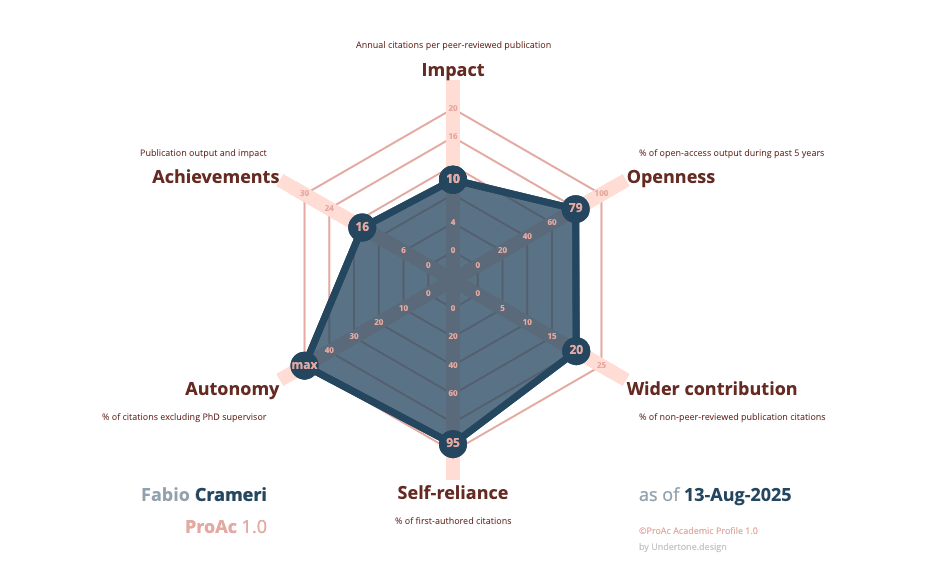

In [3]:
#__________________________________________________________________________
## ProAc(U) Profile
MinIndAnnCite   = 0
MaxIndAnnCite   = 20   #20 citations per publication and year

MinIndFACite    = 0
MaxIndFACite    = 100  #100# of first-authored citations

MinIndCite      = 0
MaxIndCite      = 50   #50# of total citations from publications without PhD supervisor

MinNonPRPimpact = 0
MaxNonPRPimpact = 25   #25# of total citations are from non-peer-reviewed publications

MinOAoutput     = 0
MaxOAoutput     = 100	#100# of total publication output is open-access

MinHindex       = 0
MaxHindex       = 30   #H-index of 50



#Derive indices
#print("Citations per output: ",CitationsPerOutput)
SortedCitationsPerPaper     = CitationsPerOutput
SortedCitationsPerPaper     = SortedCitationsPerPaper.sort_values(ascending=False,ignore_index=True)
SortedCitationsPerPaper.reset_index(inplace=True,drop=True)
#print("Citations per output sorted: ",SortedCitationsPerPaper[0],SortedCitationsPerPaper[1])

#if np.isnan(SortedCitationsPerPaper): #check for nan entries
if SortedCitationsPerPaper.isnull().values.any(): #check for nan entries
    raise ValueError('NaN entry in citations found: please check your data file!')

h_index = 0.0
for i in range(len(SortedCitationsPerPaper)):
    if SortedCitationsPerPaper[i]>=i+1:
        h_index = i+1


#INDICES
AnnualCitationsPerPRP   = TotalSumCitationsPRPperYrAndPaper

if TotalSumCitations==0:
    FAcitations         = 0
elif TotalSumCitationsFA==0:
    FAcitations         = 0
else:
    FAcitations         = 100/TotalSumCitations*TotalSumCitationsFA

if TotalSumCitations==0:
    IndependentCitations    = 0
elif TotalSumCitationsIND==0:
    IndependentCitations    = 0
else:
    IndependentCitations    = 100/TotalSumCitations*TotalSumCitationsIND

if TotalSumCitations==0:
    NonPRPimpact        = 0
elif TotalSumCitationsPRP==0:
    NonPRPimpact        = 0
else:
    NonPRPimpact        = 100-100/TotalSumCitations*TotalSumCitationsPRP

if TotalSumOutputPast5==0:
    OpenAccessOutput    = 0
elif TotalSumOutputOAPast5==0:
    OpenAccessOutput    = 0
else:
    OpenAccessOutput    = 100/TotalSumOutputPast5*TotalSumOutputOAPast5

Hindex                  = h_index


#Check for (and avoid problems with) zero values
if pd.isna(AnnualCitationsPerPRP): #check for nan entries
    AnnualCitationsPerPRP = 0
    print("AnnualCitationsPerPRP fixed 0 value")
if pd.isna(FAcitations): #check for nan entries
    FAcitations = 0
    print("FAcitations fixed 0 value")
if pd.isna(IndependentCitations): #check for nan entries
    IndependentCitations = 0
    print("IndependentCitations fixed 0 value")
if pd.isna(NonPRPimpact): #check for nan entries
    NonPRPimpact = 0
    print("NonPRPimpact fixed 0 value")
if pd.isna(OpenAccessOutput): #check for nan entries
    OpenAccessOutput = 0
    print("OpenAccessOutput fixed 0 value")
if pd.isna(Hindex): #check for nan entries
    Hindex = 0
    print("Hindex fixed 0 value")


#Check if indices exceed axis limits
print("")
if AnnualCitationsPerPRP>=MaxIndAnnCite:
    #warnings.warn("Annual citations per peer-reviewed publication exceed axis limit")
    print("-> Annual citations per peer-reviewed publication exceed axis limit.")
    print("")

if FAcitations>=MaxIndFACite:
    #warnings.warn("Fraction of first-authored citations per peer-reviewed publication exceeds axis limit")
    print("-> Fraction of first-authored citations per peer-reviewed publication exceeds axis limit.")
    print("")

if IndependentCitations>=MaxIndCite:
    #warnings.warn("Independent citations exceeds axis limit")
    print("-> Independent citations exceeds axis limit.")
    print("")


    #Tag                    AxesLimits  Label
# U1 = {...
#     AnnualCitationsPerPRP,  MinIndAnnCite,  MaxIndAnnCite,      {['\fontsize{',num2str(FontSizeDetail),'}{Annual citations per peer-reviewed publication}'] ['\fontsize{',num2str(FontSizeLabelsBig),'}{{\bfImpact}}']}
#     OpenAccessOutput,       MinOAoutput,  MaxOAoutput,          {['\fontsize{',num2str(FontSizeDetail),'}{# of open-access output during past 5 years}'] ['\fontsize{',num2str(FontSizeLabelsBig),'}{{\bfOpenness}}']}
#     NonPRPimpact,           MinNonPRPimpact,  MaxNonPRPimpact, 	{'{\bfWider contribution}'['\fontsize{',num2str(FontSizeDetail),'}{# of non-peer-reviewed publication citations}']}
#     FAcitations,            MinIndFACite,  MaxIndFACite,        {'{\bfSelf-reliance}'['\fontsize{',num2str(FontSizeDetail),'}{# of first-authored citations}']}
#     IndependentCitations,   MinIndCite,  MaxIndCite,            {'{\bfAutonomy}'['\fontsize{',num2str(FontSizeDetail),'}{# of citations excluding PhD supervisor}']}
#     Hindex,                 MinHindex,  MaxHindex,              {['\fontsize{',num2str(FontSizeDetail),'}{Publication output and impact}'] ['\fontsize{',num2str(FontSizeLabelsBig),'}{{\bfAchievements}}']} }

#         AnnualCitationsPerPRP,  MinIndAnnCite,  MaxIndAnnCite,      {' Research quality '['\fontsize{',num2str(FontSizeDetail),'}{ Annual citations per peer-reviewed publication }']}
#         OpenAccessOutput,       MinOAoutput,  MaxOAoutput,          {' Open-access contribution '['\fontsize{',num2str(FontSizeDetail),'}{ Open-access output }']}
#         NonPRPimpact,           MinNonPRPimpact,  MaxNonPRPimpact, 	{' Academic involvement '['\fontsize{',num2str(FontSizeDetail),'}{ Non-peer-reviewed publication impact }']}
#         FAcitations,            MinIndFACite,  MaxIndFACite,        {' Individual impact '['\fontsize{',num2str(FontSizeDetail),'}{ Fraction of first-authored citations }']}
#         IndependentCitations,   MinIndCite,  MaxIndCite,            {' Academic independency '['\fontsize{',num2str(FontSizeDetail),'}{ Fraction of citations excluding PhD supervisor }']}
#         ...#Hindex,                 MinHindex,  MaxHindex,              {'H-index'['\fontsize{',num2str(FontSizeDetail),'}{Peer-reviewed publication output}']}  }
#         Hindex,                 MinHindex,  MaxHindex,              {' Academic seniority '['\fontsize{',num2str(FontSizeDetail),'}{ Publication output and impact }']}  }

## plotting
categories = ["Impact",
              "Openness",
              "Wider contribution",
              "Self-reliance",
              "Autonomy",
              "Achievements",
              "Impact"] #"Openness<br>second line"
categoriesTextOnly = [categories[i] for i in range(len(categories))]
for i in range(len(categories)):
    categories[i] = BoldString1+categories[i]+BoldString2
MetricMaxValues = [MaxIndAnnCite, MaxOAoutput, MaxNonPRPimpact, MaxIndFACite, MaxIndCite, MaxHindex]

print(AnnualCitationsPerPRP,OpenAccessOutput,NonPRPimpact,FAcitations,IndependentCitations,Hindex)

try:
    AnnualCitationsPerPRP = AnnualCitationsPerPRP[0]    
except:
    pass
    
try:
    OpenAccessOutput = OpenAccessOutput[0]
except:
    pass
    
try:
    NonPRPimpact = NonPRPimpact[0]
except:
    pass
    
try:
    FAcitations = FAcitations[0]
except:
    pass
    
try:
    IndependentCitations = IndependentCitations[0]
except:
    pass
    
print(AnnualCitationsPerPRP,OpenAccessOutput,NonPRPimpact,FAcitations,IndependentCitations,Hindex)

#Hindex = Hindex
MetricActual = [float(AnnualCitationsPerPRP), float(OpenAccessOutput), float(NonPRPimpact), float(FAcitations), float(IndependentCitations), float(Hindex)]

#MetricActual.extend(AnnualCitationsPerPRP)
#MetricActual.append(OpenAccessOutput)
#MetricActual.extend(NonPRPimpact)
#MetricActual.extend(FAcitations)
#MetricActual.extend(IndependentCitations)
#MetricActual.append(Hindex)

#Close the graph
#print(MetricMaxValues)
MetricMaxValues.append(MetricMaxValues[0])
#print(MetricMaxValues)
MetricActual.append(MetricActual[0])

#MetricNormalised = MetricActual/MetricMaxValues
MetricNormalised = [a/b for a,b in zip(MetricActual,MetricMaxValues)]
#print(MetricNormalised)
#print(MetricNormalised[0],MetricNormalised[1])


numberRticks = 6
numberThetaAxes = 6
underlyingRaxis = np.linspace(0,1,numberRticks)
axisTicks1 = [np.linspace(MinIndAnnCite,MaxIndAnnCite,numberRticks),
              np.linspace(MinOAoutput,MaxOAoutput,numberRticks),
              np.linspace(MinNonPRPimpact,MaxNonPRPimpact,numberRticks),
              np.linspace(MinIndFACite,MaxIndFACite,numberRticks),
              np.linspace(MinIndCite,MaxIndCite,numberRticks),
              np.linspace(MinHindex,MaxHindex,numberRticks)] #Impact, ...


#TERMINAL OUTPUT
print("")
print(FirstName+" "+LastName)
print(CreationDateString)
print("")
for i in range(len(MetricActual)-1):
    print(categoriesTextOnly[i],": ",round(MetricActual[i], 1))


fig = go.Figure()  

fig.add_trace(go.Scatterpolar(
      name = "angular categories",
      r = MetricNormalised,
      theta = categories,
      fill='none', #'toself',
      mode="text", #"lines+markers+text",
    ))
#fig.update_traces(fill='toself')

fig.update_layout(
    autosize=False,
    height=580, 
    width =900,
    margin=dict(l=80, r=120, b=100, t=80, pad=5),
    polar=dict(
        bgcolor=CanvasColour, #"transparent",
        radialaxis=dict(
            angle=45,
            visible=False,
            showticklabels=False,
            showline=False,
            range=[-0.2,1.2],
            nticks=8,
            gridcolor=Colour2,
            gridwidth=2),
        angularaxis=dict(
            visible=True,
            direction="clockwise",
            rotation=90,
            gridcolor=Colour4,
            gridwidth=14,
            showline=False)),
    plot_bgcolor=CanvasColour,
    paper_bgcolor=CanvasColour,
    font_family = "Open Sans,Helvetica,sans-serif",
    font_color = Colour3,
    font_size = FontSizeGeneral,
    showlegend=False)



fig.add_annotation(text=BoldString1+FirstName+" "+LastName+BoldString2,
                  xref="paper", yref="paper",
                  x=AnnotationShiftX, y=AnnotationBaseY, font_color=Colour1,opacity=0.5, xanchor="right",yanchor="bottom", showarrow=False)
fig.add_annotation(text=BoldString1+LastName+BoldString2,
                  xref="paper", yref="paper",
                  x=AnnotationShiftX, y=AnnotationBaseY, font_color=Colour1, xanchor="right",yanchor="bottom", showarrow=False)
fig.add_annotation(text=ProAcString,
                  xref="paper", yref="paper",
                  x=AnnotationShiftX, y=AnnotationBaseY-0.08, font_color=Colour2, xanchor="right",yanchor="bottom", showarrow=False)
fig.add_annotation(text="as of "+BoldString1+CreationDateString+BoldString2,
                  xref="paper", yref="paper",
                  x=1-AnnotationShiftX, y=AnnotationBaseY, font_color=Colour1, xanchor="left",yanchor="bottom", showarrow=False)
fig.add_annotation(text="as of",
                  xref="paper", yref="paper",
                  x=1-AnnotationShiftX, y=AnnotationBaseY, font_color=BackgroundColour, opacity=0.5, xanchor="left",yanchor="bottom", showarrow=False)
fig.add_annotation(text=ProAcCopyrightString,
                  xref="paper", yref="paper",
                  x=1-AnnotationShiftX, y=AnnotationBaseY+ShiftWatermarkY, font_color=Colour2, font_size=FontSizeSmall, xanchor="left",yanchor="bottom", showarrow=False)
fig.add_annotation(text=UndertoneDesignWatermark,
                  xref="paper", yref="paper", 
                  x=1-AnnotationShiftX, y=AnnotationBaseY+ShiftWatermarkY-0.04, font_color=Colour5, font_size=FontSizeSmall, xanchor="left",yanchor="bottom", showarrow=False)

#Metric subexplanations
fig.add_annotation(text="Annual citations per peer-reviewed publication",
                  xref="paper", yref="paper",
                  x=0.5, y=1.07, font_color=Colour3, font_size=FontSizeSmall, xanchor="center",yanchor="bottom", showarrow=False)
fig.add_annotation(text="% of open-access output during past 5 years",
                  xref="paper", yref="paper",
                  x=1-AnnotationShiftX, y=0.8, font_color=Colour3, font_size=FontSizeSmall, xanchor="left",yanchor="bottom", showarrow=False)
fig.add_annotation(text="% of non-peer-reviewed publication citations",
                  xref="paper", yref="paper",
                  x=1-AnnotationShiftX, y=0.18, font_color=Colour3, font_size=FontSizeSmall, xanchor="left",yanchor="top", showarrow=False)
fig.add_annotation(text="% of first-authored citations",
                  xref="paper", yref="paper",
                  x=0.5, y=-0.08, font_color=Colour3, font_size=FontSizeSmall, xanchor="center",yanchor="top", showarrow=False)
fig.add_annotation(text="% of citations excluding PhD supervisor",
                  xref="paper", yref="paper",
                  x=AnnotationShiftX, y=0.18, font_color=Colour3, font_size=FontSizeSmall, xanchor="right",yanchor="top", showarrow=False)
fig.add_annotation(text="Publication output and impact",
                  xref="paper", yref="paper",
                  x=AnnotationShiftX, y=0.8, font_color=Colour3, font_size=FontSizeSmall, xanchor="right",yanchor="bottom", showarrow=False)


#Spidergraph custom spider grid
for ir in underlyingRaxis:
    fig.add_trace(go.Scatterpolar(
            r=[ir,ir,ir,ir,ir,ir,ir],
            theta=categories,
            mode="lines", #"lines+markers+text",
            fill="none",
            #fillcolor=Colour1,
            marker_color=Colour2,
            marker_size=0,
            line_width=2,
            opacity=1.0,
            name="Product A"))

if VerboseMode: 
    print(underlyingRaxis)    


for itheta in categories:
    fig.add_trace(go.Scatterpolar(
            r=[-0.2,1.1],
            theta=[str(itheta), str(itheta)],
            mode="lines", #"lines+markers+text",
            fill="none",
            #fillcolor=Colour1,
            marker_color=Colour4,
            marker_size=10,
            line_width=14, #28,
            opacity=1.0,
            name="Product A"))
    
#Actual Spider Graph
#Check for exceeding max values 
#MetricActualPrint = MetricActual.astype('str')
MetricActualPrint = ["%.0f" % MetricActual for MetricActual in MetricActual]
#MetricActual = [int(x) for x in MetricActual]

if VerboseMode:
    print(MetricActualPrint)
    
for i in range(len(MetricActual)):
    if MetricActual[i]>=MetricMaxValues[i]:
        MetricActualPrint[i] = "max"
        MetricNormalised[i] = 1
    MetricActualPrint[i] = BoldString1+MetricActualPrint[i]+BoldString2

#Spidergraph axes (loop twice to make fill darker)
for i in range(0,2):
    fig.add_trace(go.Scatterpolar(
        r=MetricNormalised,
        theta=categories,
        mode="lines+markers", #"lines+markers+text",
        fill="toself",
        #fillcolor=Colour1,
        marker_color=Colour1,
        marker_size=28,
        line_width=7,
        opacity=1.0,
        name="Product A"))

        
fig.add_trace(go.Scatterpolar(
        r=MetricNormalised,
        theta=categories,
        mode="text", #"lines+markers+text",
        name="Value Text",
        text=MetricActualPrint, #["Text A", "Text B", "Text C"],
        textposition="middle center",
        textfont = dict(
            size=FontSizeNumbers,
            color=Colour2),
        marker_color="black",
        marker_size=0,
        line_width=0))

#Axis tick labels
NumTicksInOneAxis = numberRticks
NumAxes = numberThetaAxes

if VerboseMode:
    print("axis ticks: ",axisTicks1)
    print("here: ",underlyingRaxis,list(underlyingRaxis))
    
#print(axisTicks1[1][0])
for iaxis in range(0,NumAxes):
    for iticks in range(0,NumTicksInOneAxis):
        critRdiff = (axisTicks1[iaxis][2]-axisTicks1[iaxis][1])*3/4
        if abs(axisTicks1[iaxis][iticks]-MetricActual[iaxis])>=critRdiff and not ( MetricActual[iaxis]>MetricMaxValues[iaxis] and iticks+1==NumTicksInOneAxis ):
            fig.add_trace(go.Scatterpolar(
                    r=[underlyingRaxis[iticks]],
                    theta=[categories[iaxis]], #str()
                    mode="text", #"lines+markers+text",
                    name="Axis Text",
                    text=BoldString1+str(int(axisTicks1[iaxis][iticks]))+BoldString2, #["Text A", "Text B", "Text C"],
                    textposition="middle center",
                    textfont=dict(
                        #family="sans serif",
                        size=FontSizeNumbers-4,
                        color=Colour2),
                    marker_color="black",
                    marker_size=0,
                    line_width=0)) 
            

fig.update_layout(
    polar=dict(
        bgcolor=CanvasColour),
    plot_bgcolor=CanvasColour,
    paper_bgcolor=CanvasColour)
            
fig.show()

In [4]:

# CREATE SAVE DIRECTORY
#import os

if not os.path.exists("Images"):
    os.mkdir("Images")
    
if DarkMode:
    suffix = "-Dark"
else:
    suffix = ""
    
FileName = "ProAc-"+FirstName+LastName+"-"+CreationDateString2+suffix



# SAVE FIGURES
if SavePNG:
    fig.write_image("Images/"+FileName+".png",scale=FigScale) #format="png", width=600, height=350, scale=2)
    #PlotlyJS.savefig(fig,"myplot.png",scale=FigScale)      # saves the CURRENT_PLOT as a .png
    
if SavePDF:
    fig.write_image("Images/"+FileName+".pdf")
    #PlotlyJS.savefig(fig,"myplot.pdf")      # saves the CURRENT_PLOT as a .png

if SaveSVG:
    fig.write_image("Images/"+FileName+".svg")

if SaveHTML:
    fig.write_html("Images/"+FileName+".html")

# savefig(filename_string) # save the most recent fig as filename_string (such as "output.png")
# savefig(plot_ref, filename_string) # save the fig referenced by plot_ref as filename_string (such as "output.png")
